## <center> Predictive analysis of Failure in machine</center>
<hr>


<img src="https://images.squarespace-cdn.com/content/v1/5bac99efb2cf79a76d80781d/1558676551460-RX0HCK3J77B68VPLAPBP/MEP++Challenges+in+a+Brown+Field+Project.jpg">
<hr>

This is an analysis on machine dataset that predict the failure rate.

Data science in the Construction MEP (Mechanical, Electrical, Plumbing) field can be applied in various ways, including:

**Predictive Maintenance**: Analyzing historical data to predict when equipment and systems might fail, allowing for proactive maintenance and reducing downtime.

**Energy Efficiency**: Using data analytics to optimize energy consumption, identify inefficiencies, and implement strategies for more sustainable and cost-effective energy usage.

**Risk Management**: Employing predictive modeling and analytics to assess and mitigate potential risks in construction projects, helping to avoid delays and cost overruns.

**Supply Chain Optimization**: Analyzing data to streamline the supply chain, manage inventory efficiently, and ensure timely delivery of materials, reducing project delays.

**Cost Estimation**: Leveraging data to improve accuracy in cost estimation, helping project managers make informed decisions and allocate resources effectively.

**Building Performance Monitoring**: Installing sensors and using data analytics to monitor the performance of MEP systems within buildings, ensuring they operate optimally and identifying areas for improvement.

**Workflow Optimization**: Applying data science to analyze construction workflows, identify bottlenecks, and optimize processes for increased efficiency and productivity.

**Safety Analytics**: Analyzing data to enhance safety measures on construction sites, identifying patterns that can lead to accidents, and implementing preventive measures.

**Design Optimization**: Using data to inform the design process, ensuring that MEP systems are designed for maximum efficiency and functionality.

**Project Management**: Employing data-driven insights to enhance project management processes, including scheduling, resource allocation, and progress tracking.



### Domain Analysis
<hr width="150px" align="left">
Explanation of Features:

1. **id**: Unique identifier for each piece of equipment.
2. **Product ID**: a unique identifier for a product.
3. **Type**: Type of equipment (L,M,H).
4. **Air temperature [K]**: a measure of how hot or cold the air is.
5. **Process temperature [K]**: a broad range of temperatures that process heating equipment can operate at.
6. **Rotational speed [rpm]**: Speed of rotation.
7. **Torque [Nm]**: a measure of how much twisting is applied to a fastener.
8. **Tool wear [min]**: gradual failure of cutting tools due to regular operation.
9. **Machine failure**: Binary value(0/1) indicating whether failure occured or not.
10. **TWF**: Tool Wear Failure.
11. **HDF**: Heat Dissipation Failure.
12. **PWF**: Power Failure.
13. **OSF**: Over-strain Failure.
14. **RNF**: Random Failure.


### Importing packages
<hr width="180px" align="left">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score,precision_score,recall_score,auc
from sklearn.model_selection import cross_val_score
import warnings
import pickle

warnings.filterwarnings('ignore')

### Basic Checks
<hr width="120px" align="left">

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
df.describe().T.style.bar(subset=['mean'],color='#f1cfcd').\
                        background_gradient(subset=['std'],cmap="Blues_r").\
                        background_gradient(subset=['50%'],cmap='Blues_r')

,count,mean,std,min,25%,50%,75%,max
id,136429.000000,68214.000000,39383.804275,0.000000,34107.000000,68214.000000,102321.000000,136428.000000
Air temperature [K],136429.000000,299.862776,1.862247,295.300000,298.300000,300.000000,301.200000,304.400000
Process temperature [K],136429.000000,309.941070,1.385173,305.800000,308.700000,310.000000,310.900000,313.800000
Rotational speed [rpm],136429.000000,1520.331110,138.736632,1181.000000,1432.000000,1493.000000,1580.000000,2886.000000
Torque [Nm],136429.000000,40.348643,8.502229,3.800000,34.600000,40.400000,46.100000,76.600000
Tool wear [min],136429.000000,104.408901,63.965040,0.000000,48.000000,106.000000,159.000000,253.000000
Machine failure,136429.000000,0.015744,0.124486,0.000000,0.000000,0.000000,0.000000,1.000000
TWF,136429.000000,0.001554,0.039389,0.000000,0.000000,0.000000,0.000000,1.000000
HDF,136429.000000,0.005160,0.071649,0.000000,0.000000,0.000000,0.000000,1.000000
PWF,136429.000000,0.002397,0.048899,0.000000,0.000000,0.000000,0.000000,1.000000


In [6]:
df_test.describe().T.style.bar(subset=['mean'],color='#f1cfcd').\
                        background_gradient(subset=['std'],cmap="Blues_r").\
                        background_gradient(subset=['50%'],cmap='Blues_r')

,count,mean,std,min,25%,50%,75%,max
id,90954.000000,181905.500000,26256.302529,136429.000000,159167.250000,181905.500000,204643.750000,227382.000000
Air temperature [K],90954.000000,299.859493,1.857562,295.300000,298.300000,300.000000,301.200000,304.400000
Process temperature [K],90954.000000,309.939375,1.385296,305.700000,308.700000,310.000000,310.900000,313.800000
Rotational speed [rpm],90954.000000,1520.528179,139.970419,1168.000000,1432.000000,1493.000000,1579.000000,2886.000000
Torque [Nm],90954.000000,40.335191,8.504683,3.800000,34.600000,40.500000,46.200000,76.600000
Tool wear [min],90954.000000,104.293962,63.871092,0.000000,48.000000,106.000000,158.000000,253.000000
TWF,90954.000000,0.001473,0.038355,0.000000,0.000000,0.000000,0.000000,1.000000
HDF,90954.000000,0.005343,0.072903,0.000000,0.000000,0.000000,0.000000,1.000000
PWF,90954.000000,0.002353,0.048449,0.000000,0.000000,0.000000,0.000000,1.000000
OSF,90954.000000,0.003870,0.062090,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
df.describe(include=["O"]).T.style.bar(subset=['freq'],color='#f1cfcd').\
                        background_gradient(subset=['unique'],cmap="Blues_r")

,count,unique,top,freq
Product ID,136429,9976,L53257,139
Type,136429,3,L,95354


**Insights**:
1. No null values
2. Categorical datas are present
3. Scaling is required

### Explonatory Data Analysis

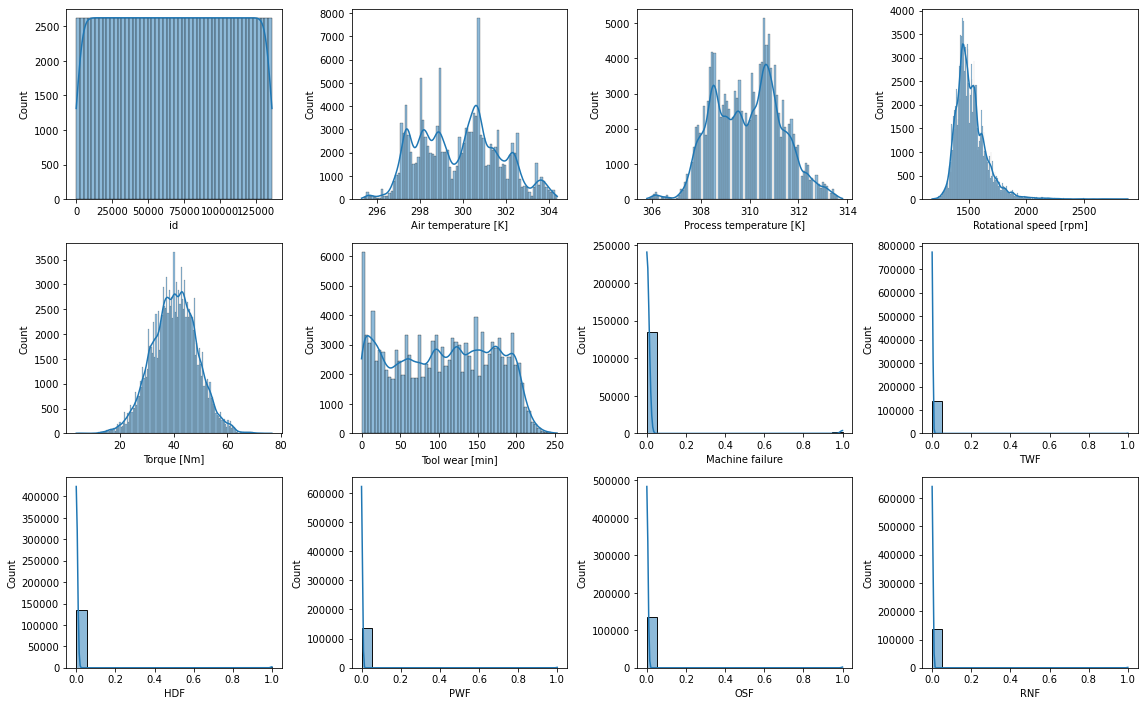

In [8]:
plt.figure(figsize=(16,16))
pltnum = 1

for column in df.select_dtypes(exclude=['object']):
    if pltnum <= 20:
        ax = plt.subplot(5,4,pltnum)
        sns.histplot(x=df[column], data = df, kde=True)
    pltnum += 1

plt.tight_layout()
plt.show()

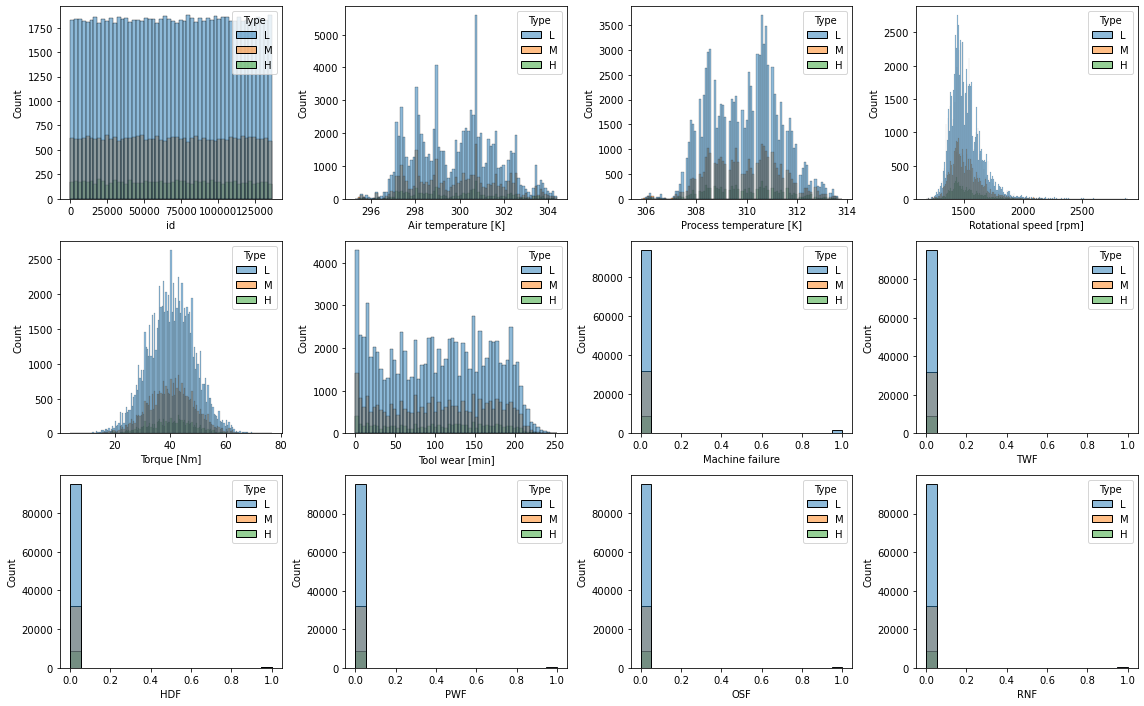

In [9]:
plt.figure(figsize=(16,16))
pltnum = 1

for column in df.select_dtypes(exclude=['object']):
    if pltnum <= 20:
        ax = plt.subplot(5,4,pltnum)
        sns.histplot(x=df[column],hue=df['Type'])
    pltnum += 1

plt.tight_layout()
plt.show()

**Insights**:
 Highly unbalanced dataset
 
 

### Data preprocessing

In [10]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

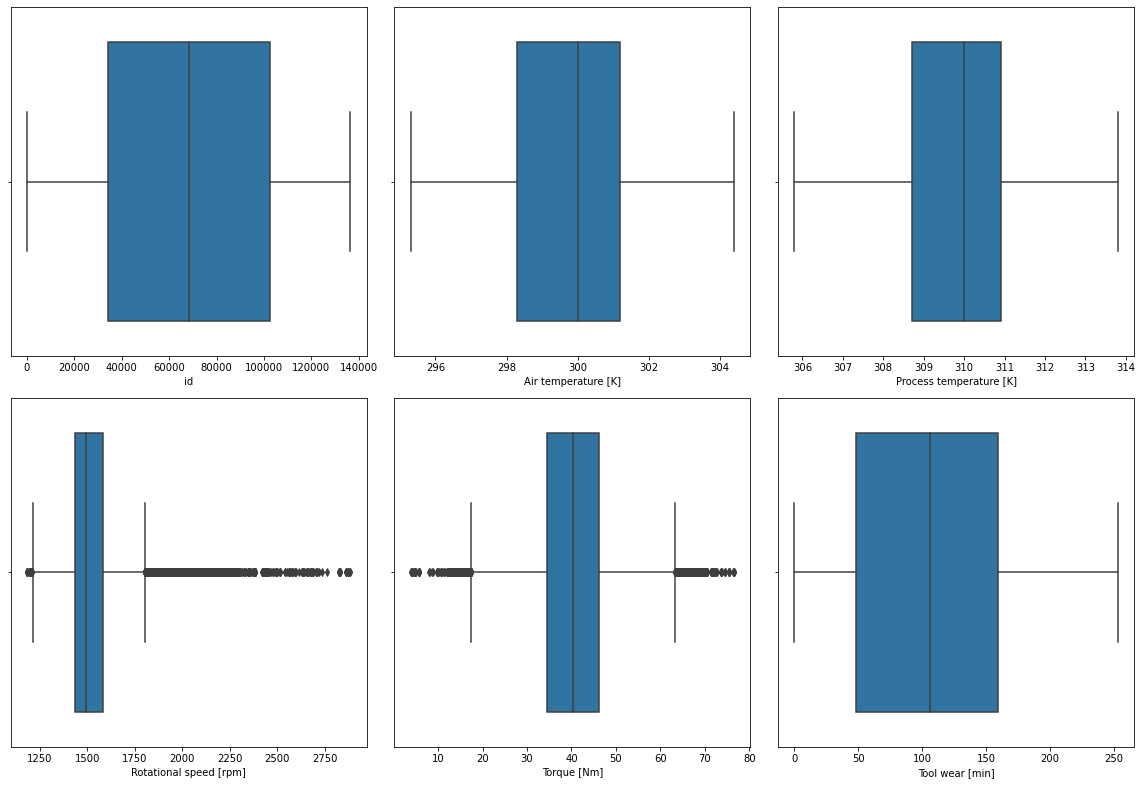

In [11]:
plt.figure(figsize=(16,16))
pltnum = 1

for column in df.select_dtypes(exclude=['object']):
    if pltnum <= 6:
        ax = plt.subplot(3,3,pltnum)
        sns.boxplot(x=df[column])
    pltnum += 1

plt.tight_layout()
plt.show()


**Handling Outliers**

In [12]:
double_iqr_handle = ['Rotational speed [rpm]', 'Torque [Nm]']
for i in range(3):
    for column in double_iqr_handle:
                IQR = stats.iqr(df[column], interpolation = 'midpoint')

                Q1 = df[column].quantile(0.25)
                Q3 = df[column].quantile(0.75)

                min_limit = Q1 - 1.5*IQR
                max_limit = Q3 + 1.5*IQR

                df.loc[df[column] > max_limit, column] = np.median(df[column])
                df.loc[df[column] < min_limit, column] = np.median(df[column])
    i+=1

In [13]:
df['Machine failure'].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

In [14]:
df['Type'].value_counts()

Type
L    95354
M    32152
H     8923
Name: count, dtype: int64

In [15]:

df.drop(columns=['id'],inplace=True)
# df_test.drop(columns=['id'],inplace=True)

In [16]:
LE = LabelEncoder()

df['Type'] = LE.fit_transform(df['Type'])
df_test['Type'] = LE.fit_transform(df_test['Type'])

df['Product ID'] = LE.fit_transform(df['Product ID'])
df_test['Product ID'] = LE.fit_transform(df_test['Product ID'])

In [17]:
df_test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,3203,1,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,4986,1,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,2958,1,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,8828,2,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,8368,2,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [18]:
sc = MinMaxScaler()

df.iloc[:,2:7] = sc.fit_transform(df.iloc[:,2:7])
df_test.iloc[:,2:7] = sc.fit_transform(df_test.iloc[:,2:7])

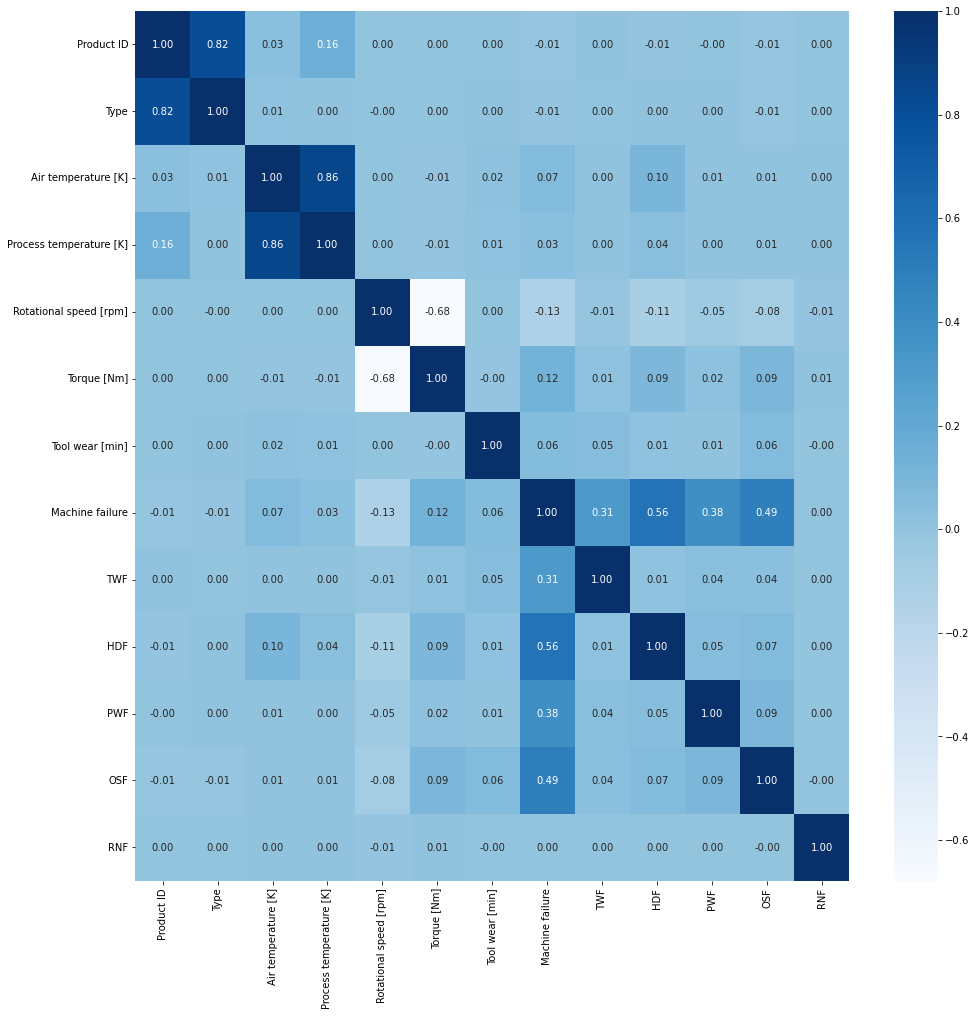

In [19]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f',cmap="Blues")
plt.show()

In [20]:
df.rename(columns={'Product ID':'product_id','Air temperature [K]':'air_temp',\
                  'Process temperature [K]':'process_temp',\
                  'Rotational speed [rpm]':'rot_speed',\
                  'Torque [Nm]':'torque','Tool wear [min]':'tool_wear_min',\
                  'Machine failure':'machine_failure'},inplace=True)
df_test.rename(columns={'Product ID':'product_id','Air temperature [K]':'air_temp',\
                  'Process temperature [K]':'process_temp',\
                  'Rotational speed [rpm]':'rot_speed',\
                  'Torque [Nm]':'torque','Tool wear [min]':'tool_wear_min'},inplace=True)

### Model Creation
<hr>

**<font color="#f10000">Aim</font>** : Planning to make prediction of Failure

In [21]:
def plot_roc_curve(y_true, y_probs, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [22]:

def run_multiple_algorithms(x_train,y_train, x_test, y_test, models):
    results = {}
    roc_auc_results = {}
    trained_models = {}
    
    for model_name, model in models.items():
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        y_pre_train = model.predict(x_train)
        y_probs = model.predict_proba(x_test)[:, 1]
        
        accuracy = accuracy_score(y_test,y_pred)
        f1_test = f1_score(y_test,y_pred)
        f1_train = f1_score(y_train,y_pre_train)
        recall = recall_score(y_test,y_pred)
        
        cv_scores = cross_val_score(model, x, y, cv=5, scoring='f1').mean()
        cv_score_mean = cross_val_score(model, x, y, cv=5, scoring='f1').std()
        
        results[model_name] = {
            'accuracy' : accuracy,
            'f1 train score' : f1_train,
            'f1 test score' : f1_test,
            'predict proba df_test' : y_probs,
            'recall score': recall,
            'cross_val_scores' : cv_scores,
            'cross_val_std' : cv_score_mean
        }
        
    trained_models[model_name] = model
    plot_roc_curve(y_test, y_probs, model_name)
        
    return results,trained_models

**FailureRate**

In [23]:
# Splitting data into independant and target variables
categorical_features = ['product_id']

x = df.drop(columns=['machine_failure'],axis=1)
y = df['machine_failure']

In [24]:
# Splitting data into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Balancing the dataset
<hr width="200px" align="left">

In [25]:
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

0:	learn: 0.1384086	total: 172ms	remaining: 17s
1:	learn: 0.0581888	total: 208ms	remaining: 10.2s
2:	learn: 0.0339603	total: 244ms	remaining: 7.89s
3:	learn: 0.0260285	total: 578ms	remaining: 13.9s
4:	learn: 0.0233501	total: 911ms	remaining: 17.3s
5:	learn: 0.0222952	total: 1.25s	remaining: 19.6s
6:	learn: 0.0218706	total: 1.27s	remaining: 16.9s
7:	learn: 0.0211632	total: 1.68s	remaining: 19.3s
8:	learn: 0.0209981	total: 1.69s	remaining: 17.1s
9:	learn: 0.0205759	total: 2.09s	remaining: 18.8s
10:	learn: 0.0202672	total: 2.5s	remaining: 20.2s
11:	learn: 0.0201444	total: 2.5s	remaining: 18.3s
12:	learn: 0.0197242	total: 2.89s	remaining: 19.3s
13:	learn: 0.0194666	total: 3.23s	remaining: 19.9s
14:	learn: 0.0190637	total: 3.58s	remaining: 20.3s
15:	learn: 0.0187594	total: 3.93s	remaining: 20.6s
16:	learn: 0.0184722	total: 4.28s	remaining: 20.9s
17:	learn: 0.0183038	total: 4.65s	remaining: 21.2s
18:	learn: 0.0181677	total: 5.01s	remaining: 21.4s
19:	learn: 0.0180166	total: 5.37s	remaining: 

63:	learn: 0.0143979	total: 21.4s	remaining: 12s
64:	learn: 0.0143585	total: 21.7s	remaining: 11.7s
65:	learn: 0.0143346	total: 22.1s	remaining: 11.4s
66:	learn: 0.0142940	total: 22.4s	remaining: 11s
67:	learn: 0.0142277	total: 22.8s	remaining: 10.7s
68:	learn: 0.0141322	total: 23.1s	remaining: 10.4s
69:	learn: 0.0141045	total: 23.5s	remaining: 10.1s
70:	learn: 0.0140169	total: 23.8s	remaining: 9.74s
71:	learn: 0.0139906	total: 24.2s	remaining: 9.41s
72:	learn: 0.0138814	total: 24.5s	remaining: 9.08s
73:	learn: 0.0137883	total: 24.9s	remaining: 8.74s
74:	learn: 0.0137381	total: 25.2s	remaining: 8.41s
75:	learn: 0.0136257	total: 25.6s	remaining: 8.08s
76:	learn: 0.0135840	total: 25.9s	remaining: 7.75s
77:	learn: 0.0134474	total: 26.3s	remaining: 7.42s
78:	learn: 0.0134206	total: 26.7s	remaining: 7.08s
79:	learn: 0.0132813	total: 27s	remaining: 6.75s
80:	learn: 0.0132543	total: 27.4s	remaining: 6.42s
81:	learn: 0.0131841	total: 27.7s	remaining: 6.09s
82:	learn: 0.0131059	total: 28.1s	rem

26:	learn: 0.0174958	total: 8.64s	remaining: 23.4s
27:	learn: 0.0174250	total: 9.01s	remaining: 23.2s
28:	learn: 0.0172724	total: 9.38s	remaining: 23s
29:	learn: 0.0171135	total: 9.75s	remaining: 22.7s
30:	learn: 0.0170364	total: 10.1s	remaining: 22.5s
31:	learn: 0.0169454	total: 10.5s	remaining: 22.3s
32:	learn: 0.0168857	total: 10.9s	remaining: 22.1s
33:	learn: 0.0168285	total: 11.3s	remaining: 22s
34:	learn: 0.0166487	total: 11.7s	remaining: 21.7s
35:	learn: 0.0165798	total: 12.1s	remaining: 21.5s
36:	learn: 0.0164595	total: 12.4s	remaining: 21.2s
37:	learn: 0.0163770	total: 12.8s	remaining: 20.9s
38:	learn: 0.0163230	total: 13.2s	remaining: 20.6s
39:	learn: 0.0162774	total: 13.7s	remaining: 20.5s
40:	learn: 0.0160749	total: 14.1s	remaining: 20.3s
41:	learn: 0.0159259	total: 14.4s	remaining: 19.9s
42:	learn: 0.0157293	total: 14.8s	remaining: 19.7s
43:	learn: 0.0155871	total: 15.2s	remaining: 19.3s
44:	learn: 0.0155019	total: 15.5s	remaining: 19s
45:	learn: 0.0154584	total: 15.9s	rem

89:	learn: 0.0117145	total: 34.3s	remaining: 3.81s
90:	learn: 0.0115671	total: 34.7s	remaining: 3.43s
91:	learn: 0.0114247	total: 35.1s	remaining: 3.05s
92:	learn: 0.0113771	total: 35.5s	remaining: 2.67s
93:	learn: 0.0112751	total: 35.9s	remaining: 2.29s
94:	learn: 0.0112025	total: 36.3s	remaining: 1.91s
95:	learn: 0.0110678	total: 36.7s	remaining: 1.53s
96:	learn: 0.0109882	total: 37.1s	remaining: 1.15s
97:	learn: 0.0109321	total: 37.5s	remaining: 765ms
98:	learn: 0.0108742	total: 37.9s	remaining: 383ms
99:	learn: 0.0107795	total: 38.3s	remaining: 0us
0:	learn: 0.1430479	total: 377ms	remaining: 37.3s
1:	learn: 0.0592862	total: 410ms	remaining: 20.1s
2:	learn: 0.0343121	total: 462ms	remaining: 14.9s
3:	learn: 0.0263676	total: 832ms	remaining: 20s
4:	learn: 0.0237102	total: 855ms	remaining: 16.2s
5:	learn: 0.0222921	total: 1.23s	remaining: 19.3s
6:	learn: 0.0215121	total: 1.61s	remaining: 21.4s
7:	learn: 0.0212412	total: 1.63s	remaining: 18.7s
8:	learn: 0.0207347	total: 2.05s	remaining:

52:	learn: 0.0150776	total: 20s	remaining: 17.7s
53:	learn: 0.0150522	total: 20.4s	remaining: 17.4s
54:	learn: 0.0149324	total: 20.8s	remaining: 17s
55:	learn: 0.0148994	total: 21.2s	remaining: 16.7s
56:	learn: 0.0148542	total: 21.6s	remaining: 16.3s
57:	learn: 0.0147539	total: 22s	remaining: 16s
58:	learn: 0.0147276	total: 22.5s	remaining: 15.6s
59:	learn: 0.0147078	total: 22.9s	remaining: 15.2s
60:	learn: 0.0146872	total: 23.3s	remaining: 14.9s
61:	learn: 0.0145683	total: 23.8s	remaining: 14.6s
62:	learn: 0.0144970	total: 24.2s	remaining: 14.2s
63:	learn: 0.0143979	total: 24.6s	remaining: 13.8s
64:	learn: 0.0143585	total: 25s	remaining: 13.5s
65:	learn: 0.0143346	total: 25.4s	remaining: 13.1s
66:	learn: 0.0142940	total: 25.8s	remaining: 12.7s
67:	learn: 0.0142277	total: 26.2s	remaining: 12.3s
68:	learn: 0.0141322	total: 26.6s	remaining: 12s
69:	learn: 0.0141045	total: 27.1s	remaining: 11.6s
70:	learn: 0.0140169	total: 27.6s	remaining: 11.3s
71:	learn: 0.0139906	total: 28s	remaining: 

15:	learn: 0.0192291	total: 4.89s	remaining: 25.7s
16:	learn: 0.0189742	total: 5.27s	remaining: 25.7s
17:	learn: 0.0188075	total: 5.64s	remaining: 25.7s
18:	learn: 0.0186407	total: 6.01s	remaining: 25.6s
19:	learn: 0.0184752	total: 6.39s	remaining: 25.5s
20:	learn: 0.0183438	total: 6.78s	remaining: 25.5s
21:	learn: 0.0181998	total: 7.17s	remaining: 25.4s
22:	learn: 0.0181094	total: 7.57s	remaining: 25.4s
23:	learn: 0.0179749	total: 7.95s	remaining: 25.2s
24:	learn: 0.0178830	total: 8.34s	remaining: 25s
25:	learn: 0.0178105	total: 8.72s	remaining: 24.8s
26:	learn: 0.0174958	total: 9.18s	remaining: 24.8s
27:	learn: 0.0174250	total: 9.55s	remaining: 24.6s
28:	learn: 0.0172724	total: 9.96s	remaining: 24.4s
29:	learn: 0.0171135	total: 10.3s	remaining: 24.1s
30:	learn: 0.0170364	total: 10.7s	remaining: 23.9s
31:	learn: 0.0169454	total: 11.1s	remaining: 23.7s
32:	learn: 0.0168857	total: 11.5s	remaining: 23.4s
33:	learn: 0.0168285	total: 11.9s	remaining: 23.1s
34:	learn: 0.0166487	total: 12.3s

77:	learn: 0.0126043	total: 30.7s	remaining: 8.67s
78:	learn: 0.0125141	total: 31.1s	remaining: 8.28s
79:	learn: 0.0124651	total: 31.6s	remaining: 7.89s
80:	learn: 0.0124238	total: 32s	remaining: 7.5s
81:	learn: 0.0123903	total: 32.4s	remaining: 7.11s
82:	learn: 0.0122894	total: 32.8s	remaining: 6.72s
83:	learn: 0.0121954	total: 33.2s	remaining: 6.32s
84:	learn: 0.0121552	total: 33.6s	remaining: 5.94s
85:	learn: 0.0120479	total: 34s	remaining: 5.54s
86:	learn: 0.0119936	total: 34.5s	remaining: 5.15s
87:	learn: 0.0119038	total: 34.9s	remaining: 4.75s
88:	learn: 0.0118445	total: 35.3s	remaining: 4.36s
89:	learn: 0.0117145	total: 35.7s	remaining: 3.97s
90:	learn: 0.0115671	total: 36.1s	remaining: 3.57s
91:	learn: 0.0114247	total: 36.5s	remaining: 3.18s
92:	learn: 0.0113771	total: 36.9s	remaining: 2.78s
93:	learn: 0.0112751	total: 37.4s	remaining: 2.39s
94:	learn: 0.0112025	total: 37.8s	remaining: 1.99s
95:	learn: 0.0110678	total: 38.2s	remaining: 1.59s
96:	learn: 0.0109882	total: 38.6s	re

[LightGBM] [Info] Number of positive: 1719, number of negative: 107424
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 109143, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015750 -> initscore=-4.135041
[LightGBM] [Info] Start training from score -4.135041
[LightGBM] [Info] Number of positive: 1718, number of negative: 107425
[LightGBM] [Info] Total Bins 1196
[LightGBM] [Info] Number of data points in the train set: 109143, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015741 -> initscore=-4.135632
[LightGBM] [Info] Start training from score -4.135632
[LightGBM] [Info] Number of positive: 1718, number of negative: 107425
[LightGBM] [Info] Total Bins 1196
[LightGBM] [Info] Number of data points in the train set: 109143, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015741 -> initscore=-4.135632
[LightGBM] [Info] Start training from score -4.135632
[

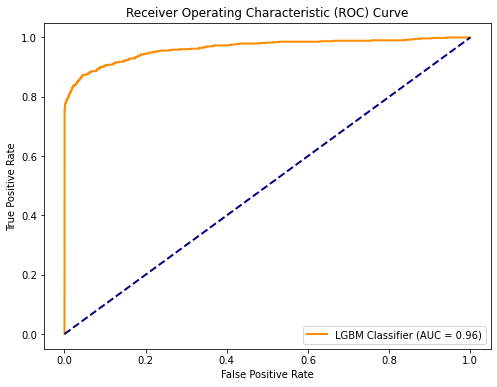

Model : CatBoost Classifier
Accuracy : 0.9960419262625523
F1_score for training dataset: 0.8971014492753623
F1_score for testing dataset: 0.8548387096774194
Test df predict proba: [9.92294495e-01 2.03021377e-04 2.45338724e-03 ... 2.34341737e-03
 1.17701971e-03 1.24543865e-04]
Recall score : 0.7535545023696683
Cross-validation scores : 0.8588643795431233
Cross-validation std : 0.012656351628701625
Model : XGBoost Classifier
Accuracy : 0.9960663588164871
F1_score for training dataset: 0.895403546869345
F1_score for testing dataset: 0.8561215370866845
Test df predict proba: [9.8543346e-01 1.1180259e-03 1.5194752e-04 ... 1.0559124e-02 1.3759008e-03
 2.2568591e-05]
Recall score : 0.7567140600315956
Cross-validation scores : 0.8594964470481685
Cross-validation std : 0.010033164238223763
Model : LGBM Classifier
Accuracy : 0.9959441960468127
F1_score for training dataset: 0.8935706501997821
F1_score for testing dataset: 0.8523131672597866
Test df predict proba: [9.88399267e-01 9.12706308e-04 3

In [26]:
models_to_run = {
#     'Logistic Regression': LogisticRegression(),
#     'KNN':KNeighborsClassifier(),
#     'SVC': SVC(C=10,gamma=100,kernel='rbf',probability=True),
#     'Decision Tree' : DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'CatBoost Classifier' : CatBoostClassifier(learning_rate= 1, iterations= 100, depth= 16,\
                                               l2_leaf_reg= 5, border_count=64),
    'XGBoost Classifier' : XGBClassifier(objective='binary:logistic', random_state=42),
    'LGBM Classifier': LGBMClassifier(force_row_wise=True)       
}

results, trained_models = run_multiple_algorithms(x_train,y_train,x_test,y_test, models_to_run)

for model, scores in results.items():
    print(f'Model : {model}')
    print(f"Accuracy : {scores['accuracy']}")
    print(f"F1_score for training dataset: {scores['f1 train score']}")
    print(f"F1_score for testing dataset: {scores['f1 test score']}")
    print(f"Test df predict proba: {scores['predict proba df_test']}")
    print(f"Recall score : {scores['recall score']}")
    print(f"Cross-validation scores : {scores['cross_val_scores']}")
    print(f"Cross-validation std : {scores['cross_val_std']}")
    print('='*90)
    
best_model_name = max(results, key=lambda k: results[k]['f1 test score'])
best_model = models_to_run[best_model_name]
print(best_model)

In [27]:
trained_models

{'LGBM Classifier': LGBMClassifier(force_row_wise=True)}

In [ ]:
catboost_model = trained_models['CatBoost Classifier']

with open('machine_model.pkl', 'wb') as file:
    pickle.dump(catboost_model, file)

**RandomizedSearchCV**
<hr width="160px" align="left">

In [34]:
def hyper_parametric_tuning(models, x, y):
    param_result = {}
    for model_name, model_info in models.items():
        model = model_info['model']
        param_grid = model_info.get('param_grid', {})

        random_search = RandomizedSearchCV(model, param_distributions=param_grid,\
                                           n_iter=10, cv=5, scoring='f1', random_state=42, n_jobs=1)
        random_search.fit(x, y)

        param_result[model_name] = {
            'best parameters': random_search.best_params_,
            'best estimator': random_search.best_estimator_
        }

    return param_result

In [ ]:
models_to_test = {
#     'Logistic Regression': {'model':LogisticRegression(),'param_grid':{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}},
#     'KNN': {'model':KNeighborsClassifier(),'param_grid':{}},
#     'SVC' : {'model':SVC(),'param_grid':{'kernel': ['linear','poly','rbf','sigmoid'],\
#                                          'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}},
#     'Decision Tree' : {'model':DecisionTreeClassifier(random_state=42),\
#                        'param_grid':{'max_depth': [None, 5, 10, 15],'min_samples_split': [2, 5, 10],\
#                                      'min_samples_leaf': [1, 2, 4]}},
#     'Random Forest': {'model':RandomForestClassifier(),'param_grid':{'n_estimators': [50, 100, 200],\
#                                                                      'max_depth': [None, 5, 10, 15],\
#                                                                      'min_samples_split': [2, 5, 10],\
#                                                                      'min_samples_leaf': [1, 2, 4]}},
#     'Gradient Boosting' : {'model':GradientBoostingClassifier(random_state=42),\
#                            'param_grid':{'n_estimators': [50, 100, 200],'learning_rate': [0.01, 0.1, 0.2],\
#                                          'max_depth': [3, 5, 7],'min_samples_split': [2, 5, 10],\
#                                          'min_samples_leaf': [1, 2, 4]}},
    'XGBoost Classifier' : {'model':XGBClassifier(objective='binary:logistic', random_state=42),\
                            'param_grid':{'learning_rate': [0.01, 0.1, 0.2],'n_estimators': [50, 100, 200],\
                                          'max_depth': [3, 5, 7],'subsample': [0.8, 0.9, 1],\
                                          'colsample_bytree': [0.8, 0.9, 1]}},
    'LGBM Classifier' : {'model':LGBMClassifier(force_row_wise=True,random_state=42),\
                         'param_grid':{'learning_rate': [0.001, 0.01, 0.1],'n_estimators': [100, 500, 1000],\
                                       'max_depth': [5, 10, 15],'num_leaves': [31, 63, 127]}},
    'CatBoost Classifier' : {'model':CatBoostClassifier(random_state=42, verbose=0,cat_features=categorical_features),\
                             'param_grid':{'learning_rate': [0.001, 0.01, 0.1,1,100,1000],'iterations': [100,200,300,500,1000],\
                                           'depth': [2,3,5,7,10,16],'l2_leaf_reg': [1, 3, 5,7,9],'border_count': [32, 64, 128]}}
}

tuned_parameters = hyper_parametric_tuning(models_to_test, x_train, y_train)

for model, scores in tuned_parameters.items():
    print(f'Model : {model}')
    print(f"\033[1m best parameters \033[0m : {scores['best parameters']}")
    print(f"\033[1m best estimator \033[0m : {scores['best estimator']}")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1212, number of negative: 75188
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 76400, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015864 -> initscore=-4.127720
[LightGBM] [Info] Start training from score -4.127720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1212, number of negative: 75188
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 76400, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015864 -> initscore=-4.127720
[LightGBM] [Info] Start training from score -4.127720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 1212, number of negative: 75188
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 76400, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015864 -> initscore=-4.127720
[LightGBM] [Info] Start training from score -4.127720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 1212, number of negative: 75188
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 76400, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015864 -> initscore=-4.127720
[LightGBM] [Info] Start training from score -4.127720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 1212, number of negative: 75188
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 76400, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015864 -> initscore=-4.127720
[LightGBM] [Info] Start training from score -4.127720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1212, number of negative: 75188
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 76400, number of used features: 12
[LightGBM] [Info] [bin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 1212, number of negative: 75188
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 76400, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015864 -> initscore=-4.127720
[LightGBM] [Info] Start training from score -4.127720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 1212, number of negative: 75188
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 76400, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015864 -> initscore=-4.127720
[LightGBM] [Info] Start training from score -4.127720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 1212, number of negative: 75188
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 76400, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015864 -> initscore=-4.127720
[LightGBM] [Info] Start training from score -4.127720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1212, number of negative: 75188
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 76400, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015864 -> initscore=-4.127720
[LightGBM] [Info] Start training from score -4.127720
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] N

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        # Add other transformers for numerical columns if needed
    ],
    remainder='passthrough'
)

In [29]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier())
])

In [ ]:
# Specify the hyperparameter grid for tuning
param_grid = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'classifier__activation': ['relu', 'tanh', 'logistic'],
    'classifier__solver': ['adam', 'sgd'],
    'classifier__alpha': [0.0001, 0.001, 0.01],
    'classifier__learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Use GridSearchCV for exhaustive search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_estimator.predict(x_test)

# Evaluate the performance
classification_rep = classification_report(y_test, y_pred)

print("Best Parameters:", best_params)
print("Classification Report:")
print(classification_rep)

### Making predictions and checking probability

In [58]:
with open('machine_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [59]:
predictions = loaded_model.predict(df_test.iloc[:,:])

In [62]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
probability_scores = loaded_model.predict_proba(df_test.iloc[:,:])[:, 1]

In [63]:
probability_scores

array([2.34118813e-03, 1.83890198e-05, 1.21142397e-02, ...,
       7.92531681e-03, 1.20048398e-02, 2.82151920e-03])

In [72]:
test_data = pd.DataFrame(columns=['id','machine failure'])

test_data['id'] = df_test['id']
test_data['machine failure'] = probability_scores

test_data.to_csv('predictions.csv', index=False)